In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
from google.colab import files
print("Please upload dataset file in csv format")
uploaded = files.upload()

Please upload dataset file in csv format


Saving climate_data.csv to climate_data.csv


In [43]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(df)

          date  temperature  humidity  co2_levels location  wind_speed  \
0   2024-01-01         25.3        78       412.5  Karachi          14   
1   2024-01-02         26.7        75       413.2  Karachi          13   
2   2024-01-03         28.1        80       414.0  Karachi          16   
3   2024-01-04         29.3        82       415.3  Karachi          15   
4   2024-01-05         30.0        85       416.0  Karachi          17   
5   2024-01-06         26.8        79       413.4  Karachi          12   
6   2024-01-07         27.1        80       414.2  Karachi          13   
7   2024-01-08         28.2        81       415.1  Karachi          14   
8   2024-01-09         29.0        83       416.4  Karachi          15   
9   2024-01-10         29.6        84       417.0  Karachi          16   
10  2024-01-11         28.3        82       416.8  Karachi          14   
11  2024-01-12         27.9        81       415.9  Karachi          13   
12  2024-01-13         26.4        80 

In [44]:
df.isnull().sum()
df.dropna(inplace=True)

In [45]:
X = df.drop(['date', 'temperature', 'location'],axis=1)
y = df['temperature']

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [48]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [49]:
y_pred = model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [51]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.21
Root Mean Squared Error: 0.46
Mean Absolute Error: 0.36
R-squared Score: 0.93


In [52]:
train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}")
print(f"Testing Accuracy: {test_accuracy+train_accuracy*100:.2f}")

Training Accuracy: 98.95
Testing Accuracy: 99.88


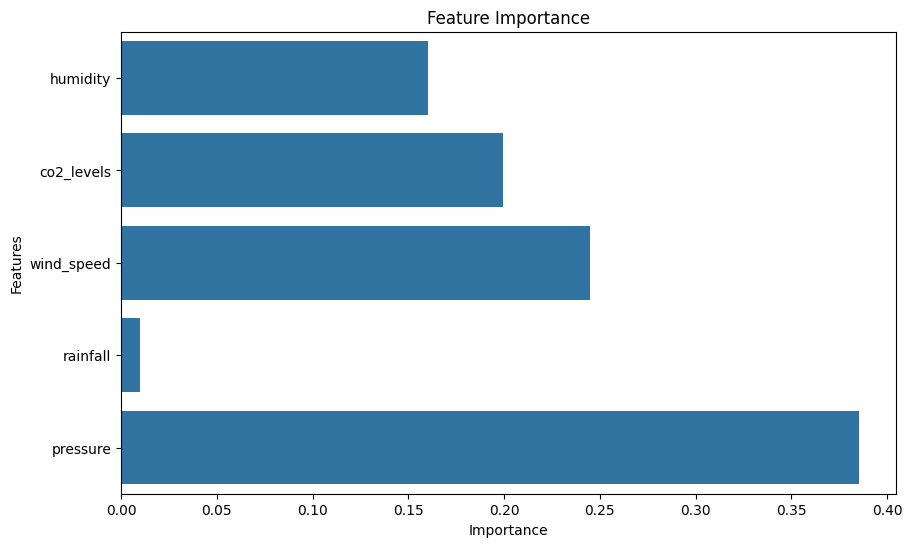

In [53]:
importances = model.feature_importances_
features = df.drop(['date', 'temperature', 'location'],axis=1).columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances,y=features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

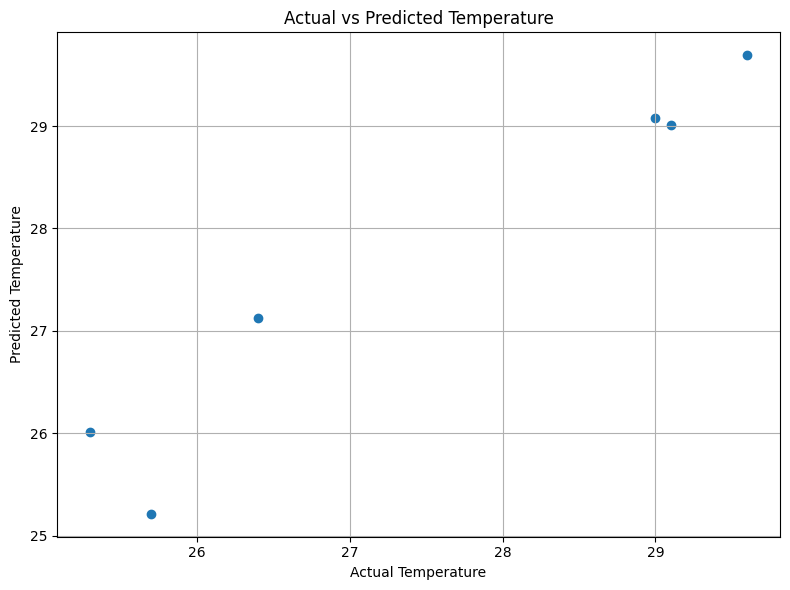

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
user_input = pd.DataFrame([[55,12,3.2,1010,500]],  columns=df.drop(['date', 'temperature', 'location'],axis=1).columns)
user_input_scaled = scaler.transform(user_input)
predicted_temperature = model.predict(user_input_scaled)
print(f"Predicted Temperature:{predicted_temperature[0]:.2f}")

Predicted Temperature:26.80


Regression Report:
MAE  : 0.3627
MSE  : 0.2141
RMSE : 0.4627
R²   : 0.9306


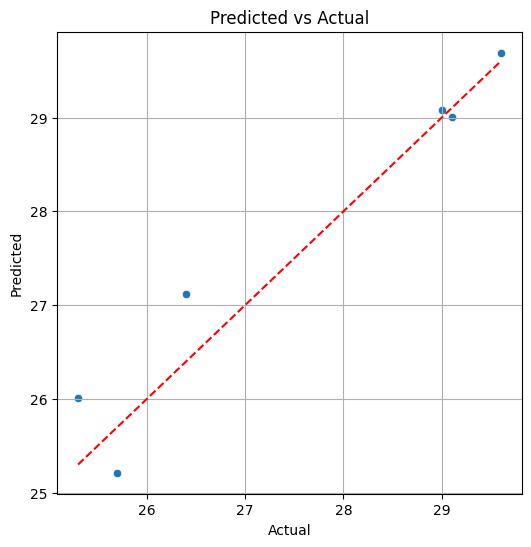

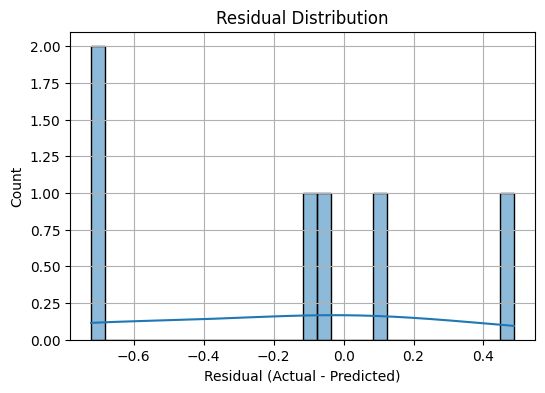

In [56]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Regression Report:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()


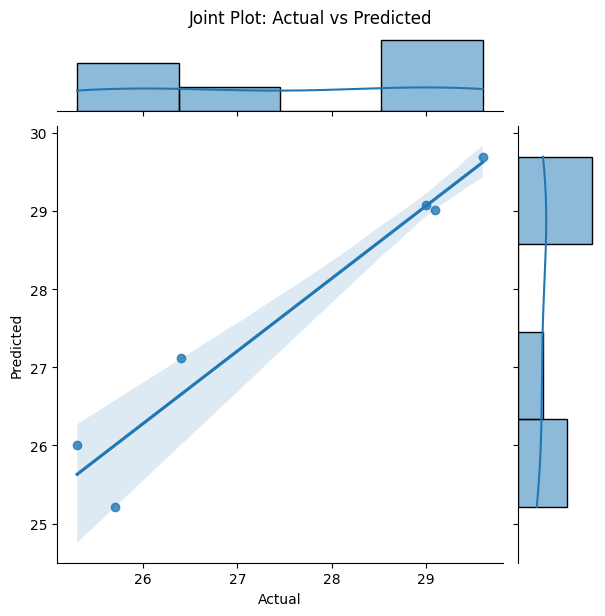

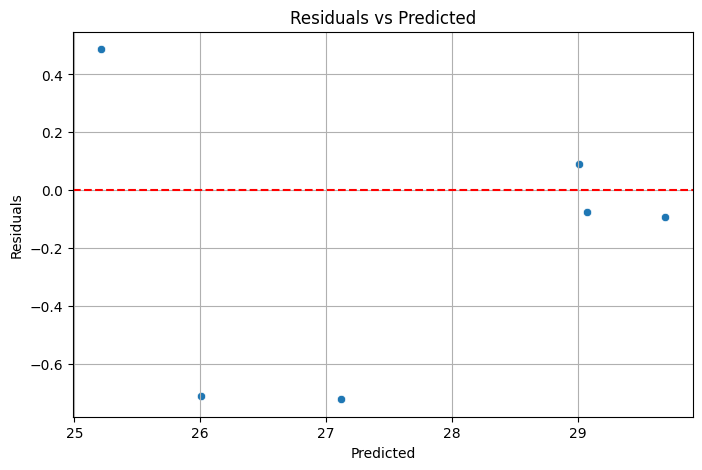

In [58]:


# 1. Joint Plot of Actual vs Predicted
sns.jointplot(x=y_test, y=y_pred, kind='reg', height=6)
plt.suptitle("Joint Plot: Actual vs Predicted", y=1.02)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# 2. Residuals vs Predicted Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()
